Applying linear regression to the bike sharing data set.

We want to calculate the number of bikes depending on the season, working day/holiday, etc information we have explored in the Capital Bike Sharing project. Use the historical data, which are the ones with temperature and weather informations.

Use the R2 score and the Mean Square Error (MSE) and/or Mean Absolute Error (MAE) for evaluating your model performance. 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches
from numpy import average
import datetime as dt
from datetime import datetime
from matplotlib.pyplot import figure
import seaborn as sb

In [9]:
# Import the modiefied core datasets
daily_core = pd.read_csv('data/mod_data/day_mod.csv')
hourly_core = pd.read_csv('data/mod_data/hour_mod.csv')

In [10]:
hourly_core['date_time'] = pd.to_datetime(hourly_core['date_time'])

In [11]:
hourly_core.columns

Index(['date_time', 'instant', 'date_day', 'season', 'year', 'month', 'hour',
       'is_holiday', 'weekday', 'is_workday', 'weather', 'temp', 'temp_feel',
       'humidity', 'windspeed', 'casual', 'registered', 'total_riders',
       'weather_desc', 'daytime', 'cold', 'hot', 'muggy'],
      dtype='object')

In [12]:
correlations = hourly_core.corr() # default is Pearson coefficient
correlations['temp_feel']

instant         0.137615
year            0.039222
month           0.208096
is_workday      0.054667
weather        -0.105563
temp            0.987672
temp_feel       1.000000
humidity       -0.051918
windspeed      -0.062336
casual          0.454080
registered      0.332559
total_riders    0.400929
cold           -0.729867
hot             0.533605
muggy          -0.016941
Name: temp_feel, dtype: float64

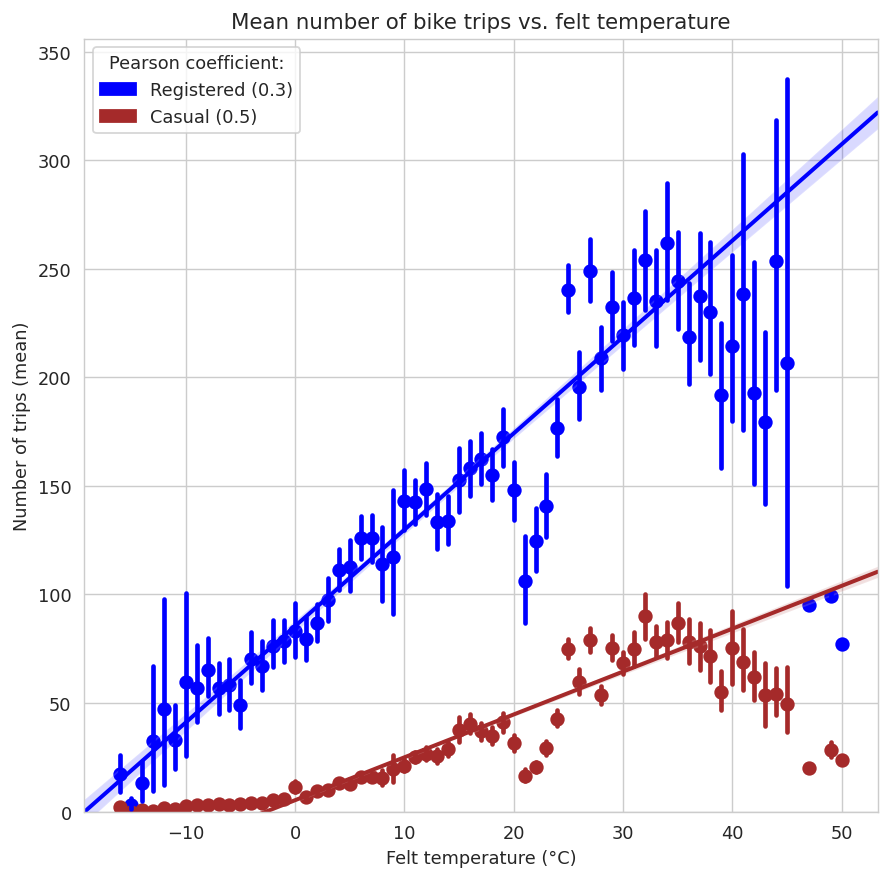

In [15]:
plt.figure(figsize=(8,8), dpi=128)
sb.set_style("whitegrid")
s1 = sb.regplot(x='temp_feel', y='registered', data=hourly_core, ci=95, truncate=False, x_estimator=np.mean, color='blue')
s2 = sb.regplot(x='temp_feel', y='casual', data=hourly_core, ci=95, truncate=False, x_estimator=np.mean, color='brown')
plt.ylim(0)
plt.title('Mean number of bike trips vs. felt temperature')
plt.ylabel('Number of trips (mean)')
plt.xlabel('Felt temperature (°C)')
top_bar = mpatches.Patch(color='blue', label='Registered (0.3)')
bottom_bar = mpatches.Patch(color='brown', label='Casual (0.5)')
plt.legend(title='Pearson coefficient:', handles=[top_bar, bottom_bar], loc='upper left');